## Glosario minimo de metodos para EDA

Compendio de metodos de analisis exploratorio de datos extraidos de diferentes cursos:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('...')

df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['basesalary'] = df['basesalary'].astype(int)

In [ ]:
df.drop(['dmaid', 'cityid', 'stockgrantvalue', 'timestamp'], axis = 1, inplace = True)

In [ ]:
df.drop(['rowNumber'], axis = 1, inplace = True)

In [ ]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
def faang_classifier(company):
  faang = ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google']
  if company in faang:
    return 1
  else:
    return 0

In [ ]:
df['is_faang'] = df['company'].apply(lambda x: faang_classifier(x))

df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,...,0,0,0,0,0,0,0,NaN,NaN,1
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,...,0,0,0,0,0,0,0,NaN,NaN,1
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0


In [ ]:
df.replace("", np.nan, inplace = True)

In [ ]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
is_faang                       0
dtype: int64

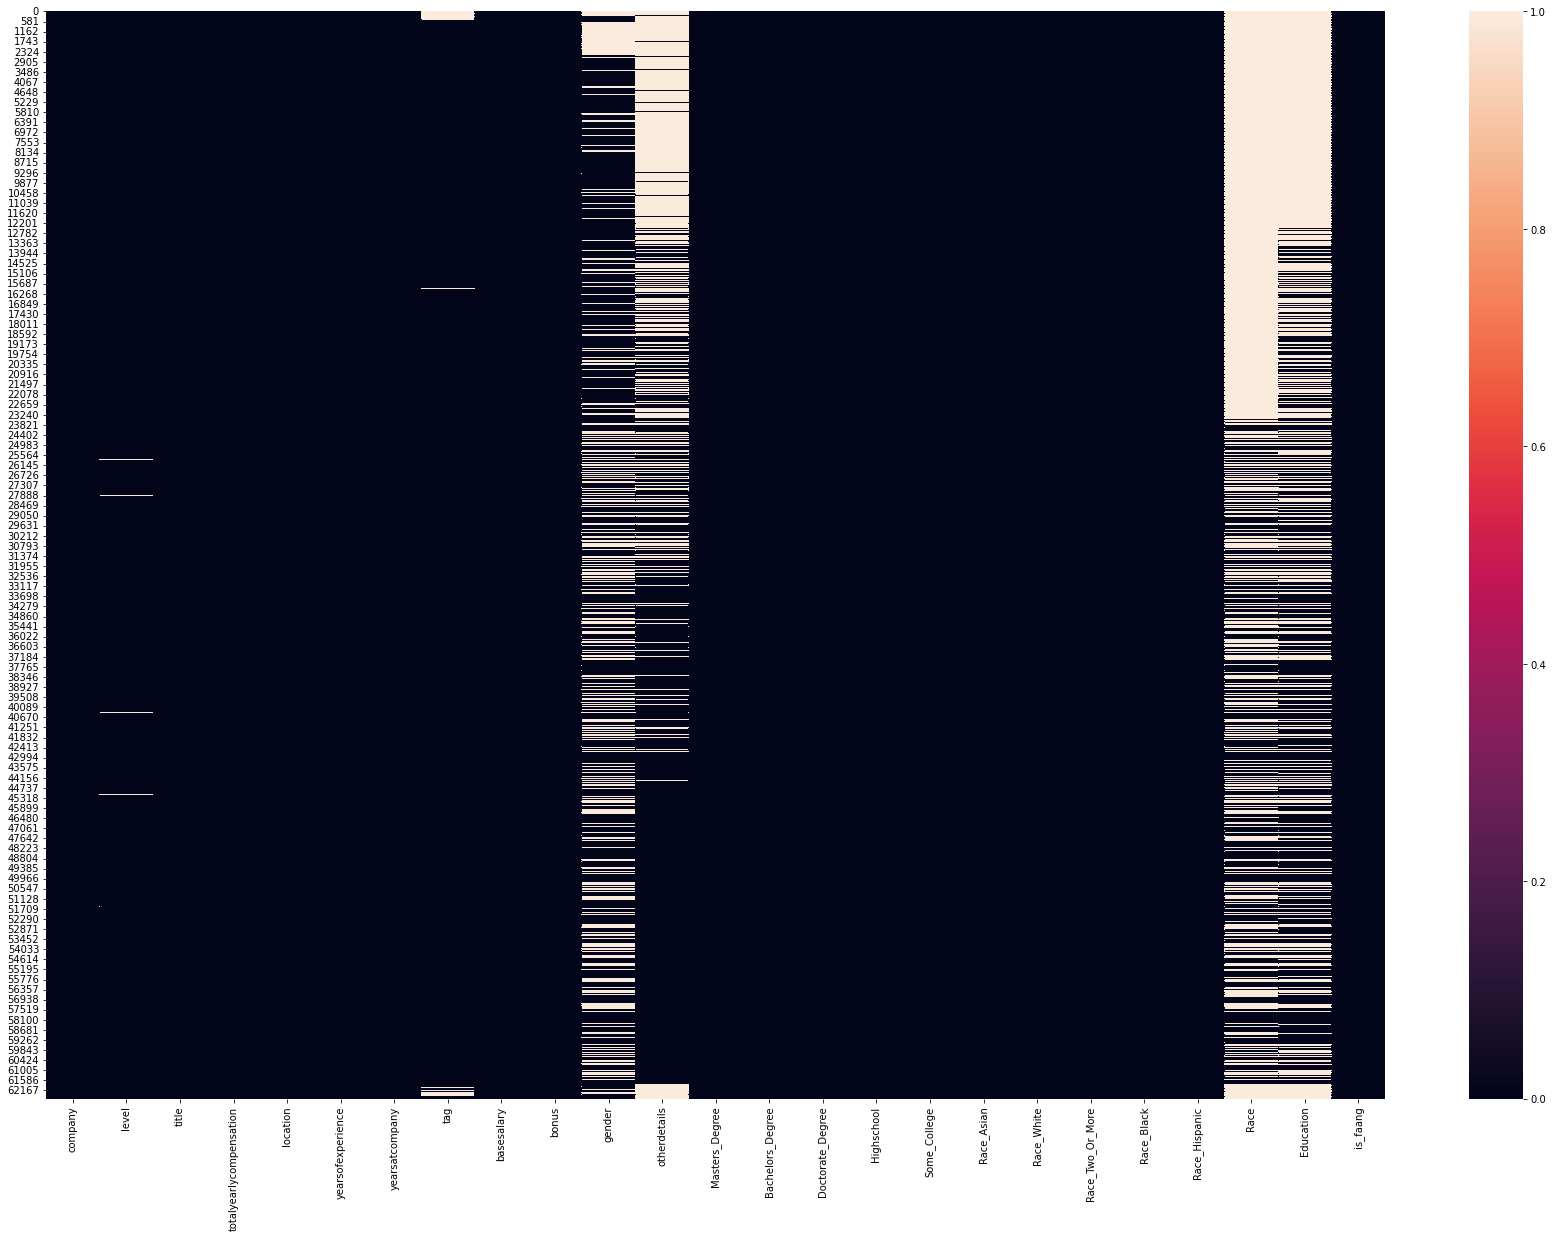

In [ ]:
plt.figure(figsize = (30,20))

sns.heatmap(df.isna())

plt.show()

In [ ]:
col_numericas = df.select_dtypes(['float64', 'int'])

col_categoricas = df.select_dtypes(['object'])

In [ ]:
for col in col_numericas.columns:
  df[col].fillna(df[col].mean(), inplace= True)

for col in col_categoricas.columns:
  df[col].fillna(df[col].mode().values[0], inplace= True)

In [ ]:
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
bonus                      0
gender                     0
otherdetails               0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
is_faang                   0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


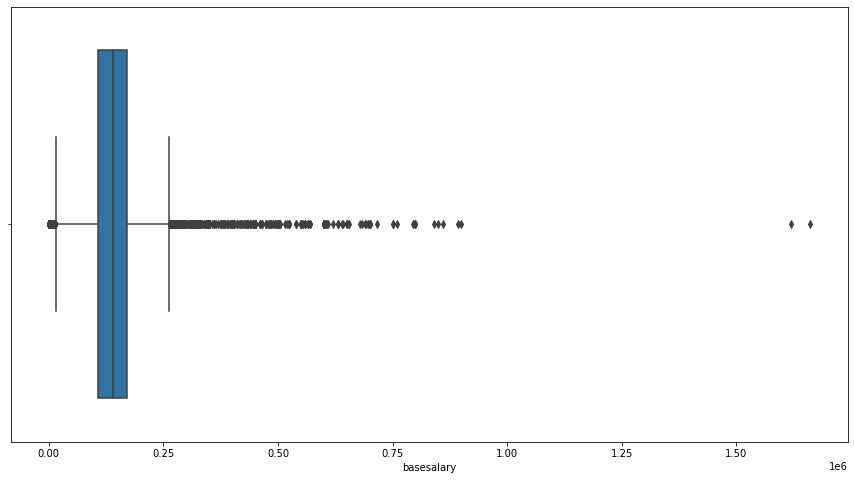

In [ ]:
plt.figure(figsize = (15,8))

sns.boxplot(df.basesalary)

plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

lim_inferior = 0.02
lim_superior = 0.02

In [ ]:
cols_to_winsorize = ['basesalary', 'yearsatcompany']

for col in cols_to_winsorize:
  df[col] = winsorize(df[col], limits = [lim_inferior, lim_superior])

In [ ]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
count,6.234000e+04,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000
mean,2.163281e+05,7.210963,2.630751,135159.180382,19338.694189,0.246182,0.201861,0.028858,0.005133,0.005695,0.188450,0.128649,0.012865,0.011020,0.018094,0.282820
std,1.381433e+05,5.839808,2.927262,54702.034952,26800.859652,0.430789,0.401392,0.167408,0.071462,0.075248,0.391075,0.334814,0.112693,0.104398,0.133294,0.450373
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.980000e+06,69.000000,13.000000,250000.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df[df['is_faang'] == 1]

In [ ]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,Full Stack,155000,0.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,Full Stack,157000,35000.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
14,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,Full Stack,160000,0.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
15,Amazon,L5,Software Engineer,218000,"Seattle, WA",10.0,0.0,Full Stack,150000,61000.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
16,Facebook,E3,Software Engineer,168000,"Menlo Park, CA",1.0,1.0,Full Stack,0,0.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1


<function matplotlib.pyplot.show(*args, **kw)>

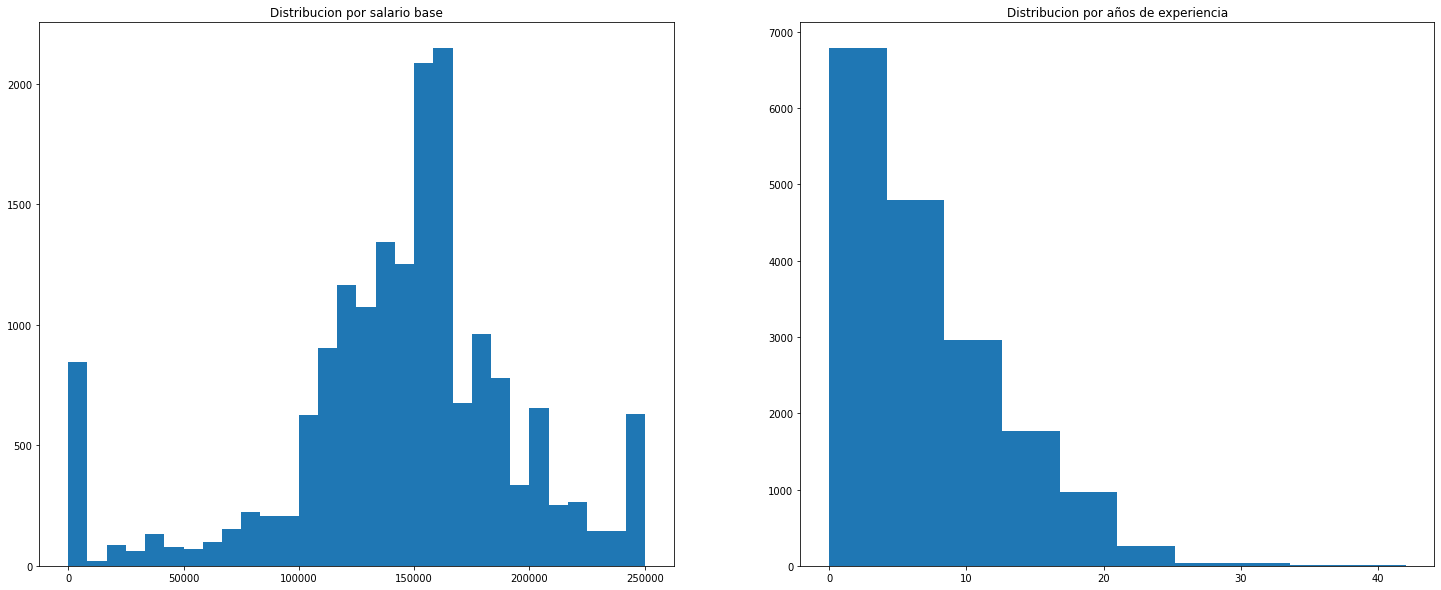

In [ ]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
plt.hist(x = df['basesalary'], bins = 30)
plt.title('Distribucion por salario base')

plt.subplot(1,2,2)
plt.hist(x = df['yearsofexperience'], bins = 10)
plt.title('Distribucion por años de experiencia')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

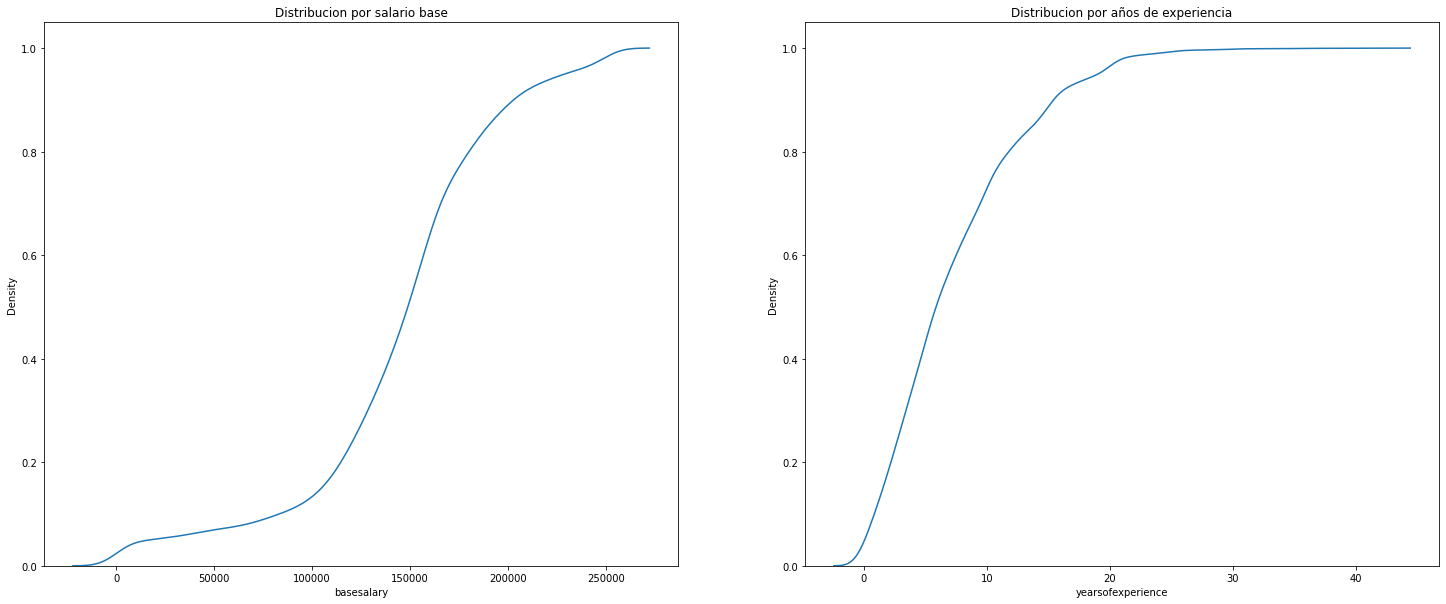

In [ ]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.kdeplot(data = df, x = 'basesalary', cumulative=True)
plt.title('Distribucion por salario base')

plt.subplot(1,2,2)
sns.kdeplot(data = df, x = 'yearsofexperience', cumulative=True)
plt.title('Distribucion por años de experiencia')

plt.show

In [ ]:
cols_skew_curt = ['basesalary', 'yearsofexperience']

for i in cols_skew_curt:
  print(i, ':')
  print('Esta distribución tiene una asimetria de:', df[i].skew())
  print('Esta distribución tiene una curtosis de:', df[i].kurt())
  print('-------------------------------------------------------')

basesalary :
Esta distribución tiene una asimetria de: -0.7722729165891571
Esta distribución tiene una curtosis de: 1.3460661286879585
-------------------------------------------------------
yearsofexperience :
Esta distribución tiene una asimetria de: 1.0603881861280036
Esta distribución tiene una curtosis de: 1.1824062669254962
-------------------------------------------------------


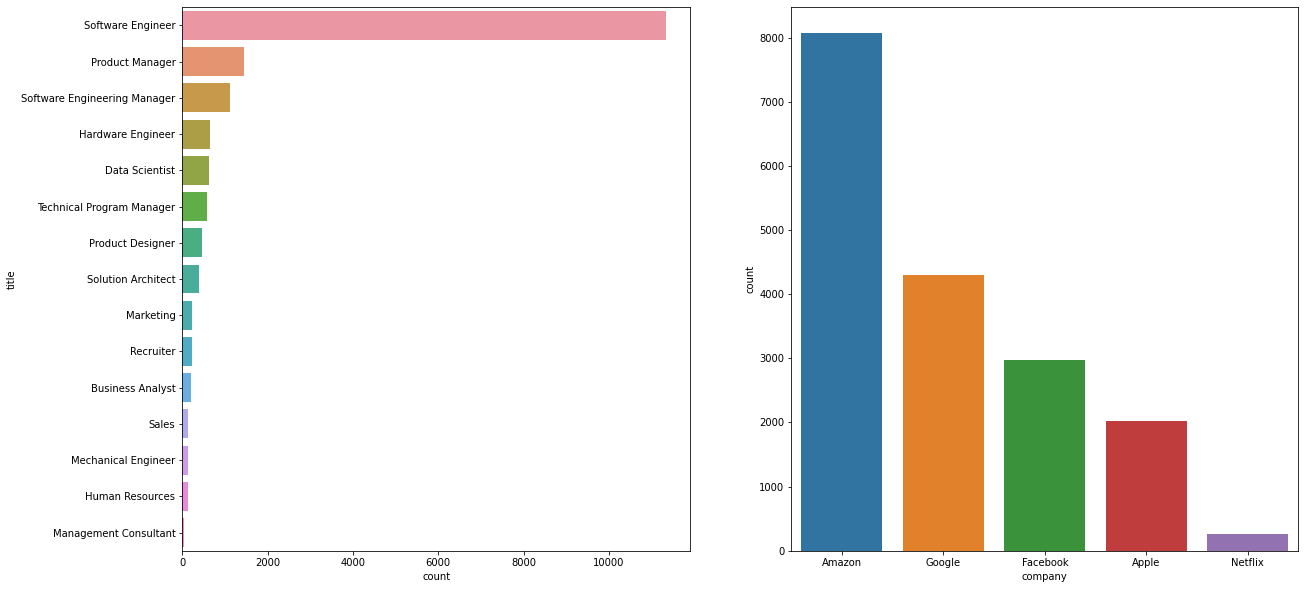

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(data = df, y = 'title', order = df['title'].value_counts().index)

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'company', order = df['company'].value_counts().index)

plt.show()

In [ ]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
totalyearlycompensation,1.000000,0.503835,0.316496,0.564444,0.418209,0.022206,-0.082902,0.097903,-0.010145,0.012303,-0.043455,0.018944,-0.004538,-0.015260,-0.031440,NaN
yearsofexperience,0.503835,1.000000,0.416406,0.346089,0.210766,0.050838,-0.056143,-0.011420,0.003343,0.036696,-0.063731,0.069359,-0.001865,-0.008837,-0.004389,NaN
yearsatcompany,0.316496,0.416406,1.000000,0.161512,-0.058416,-0.003674,-0.010417,0.003975,-0.011001,-0.004277,-0.012790,0.029405,-0.009327,-0.035978,-0.019515,NaN
basesalary,0.564444,0.346089,0.161512,1.000000,0.357533,0.112416,-0.031346,0.128746,0.001035,0.024629,0.009718,0.069095,0.013781,0.005623,-0.006218,NaN
bonus,0.418209,0.210766,-0.058416,0.357533,1.000000,0.031330,-0.028200,0.077814,-0.003788,0.009101,-0.002554,0.013662,0.018876,0.009041,0.002217,NaN
Masters_Degree,0.022206,0.050838,-0.003674,0.112416,0.031330,1.000000,-0.250626,-0.093022,-0.039420,-0.036770,0.306845,0.048339,0.026398,0.028403,0.011025,NaN
Bachelors_Degree,-0.082902,-0.056143,-0.010417,-0.031346,-0.028200,-0.250626,1.000000,-0.092885,-0.030844,-0.028770,0.262789,0.354188,0.106997,0.100231,0.151021,NaN
Doctorate_Degree,0.097903,-0.011420,0.003975,0.128746,0.077814,-0.093022,-0.092885,1.000000,-0.014589,-0.013608,0.048835,0.065070,0.004666,-0.004320,0.014172,NaN
Highschool,-0.010145,0.003343,-0.011001,0.001035,-0.003788,-0.039420,-0.030844,-0.014589,1.000000,-0.004519,-0.014557,0.097169,0.029262,0.025624,0.074144,NaN
Some_College,0.012303,0.036696,-0.004277,0.024629,0.009101,-0.036770,-0.028770,-0.013608,-0.004519,1.000000,-0.011178,0.115878,0.040370,0.019680,0.010201,NaN


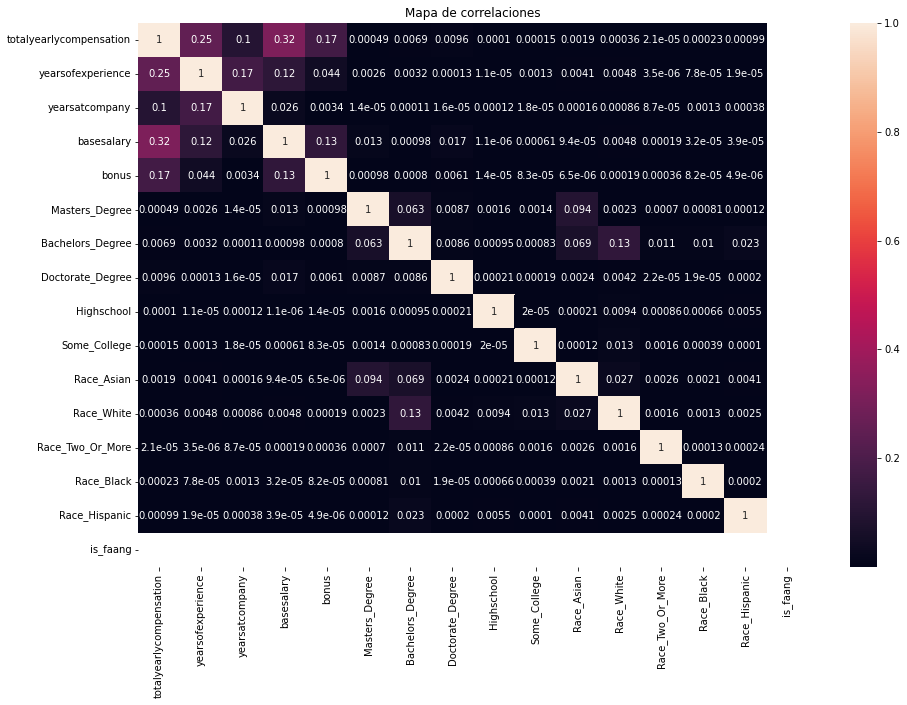

In [ ]:
plt.figure(figsize = (15,10))

sns.heatmap(df.corr() ** 2, annot=True)
plt.title('Mapa de correlaciones')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you

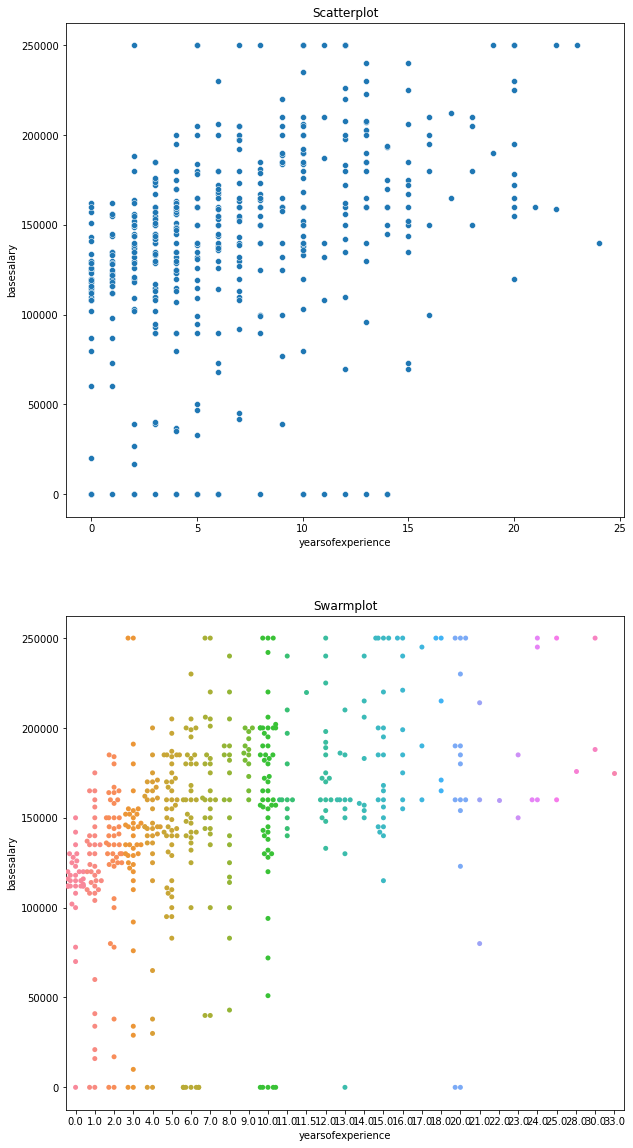

In [ ]:
plt.figure(figsize = (10,20))

plt.subplot(2,1,1)
sns.scatterplot(data = df.sample(500), x = 'yearsofexperience', y= 'basesalary')
plt.title('Scatterplot')

plt.subplot(2,1,2)
sns.swarmplot(data = df.sample(500), x = 'yearsofexperience', y= 'basesalary')
plt.title('Swarmplot')

plt.show()

<Figure size 1080x720 with 0 Axes>

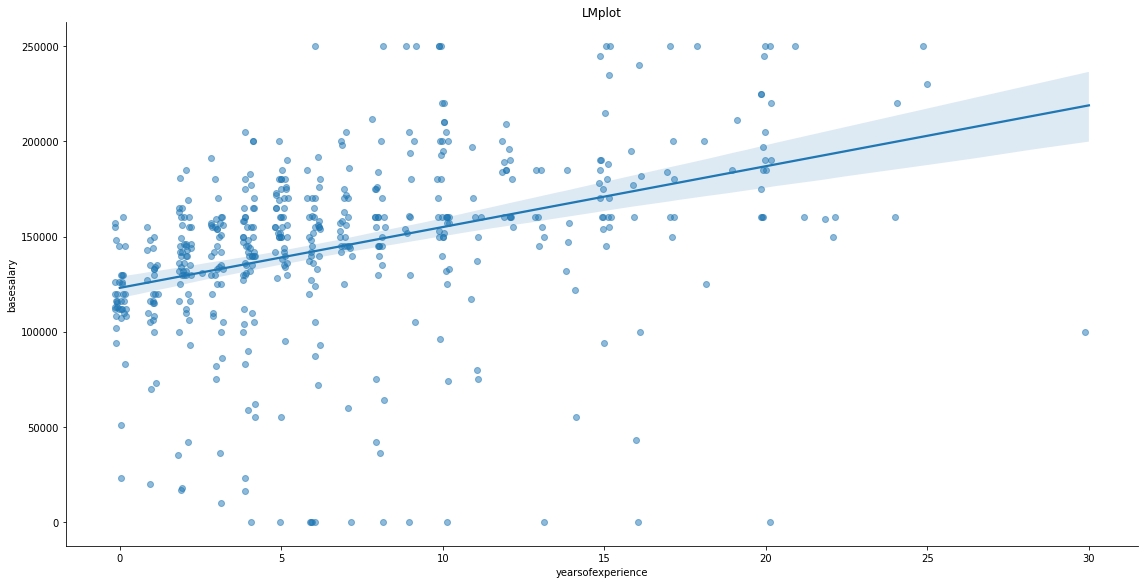

In [ ]:
plt.figure(figsize = (15,10))

sns.lmplot(data = df.sample(500), x = 'yearsofexperience', y= 'basesalary', height = 8, aspect = 2, scatter_kws= {'alpha': 0.5}, x_jitter= 0.2)
plt.title('LMplot')

plt.show()

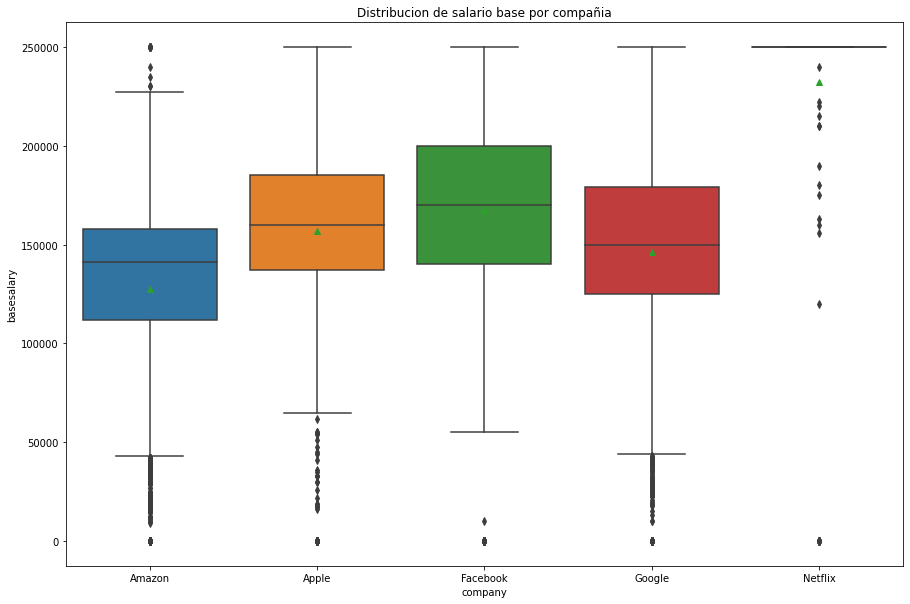

In [ ]:
plt.figure(figsize = (15,10))

sns.boxplot(data = df, x = 'company', y= 'basesalary',showmeans=True)
plt.title('Distribucion de salario base por compañia')

plt.show()